###### 과대적합(Overfitting)과 과소적합(Underfitting)
    일정 에포크 동안 훈련을 시키면 검증세트에서 모델 성능이 최고점에 도달한 다음 감소하기 시작한 것을 알 수 있습니다.
    훈련 세트에서 높은 성능을 얻을 수 있지만 진짜 원하는 것은 테스트 세트(또는 이전에 본 적 없는 데이터)에 잘 일반화되는 모델입니다.
    
    과소적합이란 테스트 세트의 성능이 향상될 여지가 아직 있을 때 일어납니다. 발생하는 원인은 여러가지입니다. 모델이 너무 단순하거나, 규제가 너무 많거나, 그냥 단순히 충분히 오래 훈련하지 않는 경우입니다. 즉 네트워크가 훈련 세트에서 적절한 패턴을 학습하지 못했다는 뜻입니다.
    
    모델을 너무 오래 훈련하면 과대적합되기 시작하고 테스트 세트에서 일반화되지 못하는 패턴을 훈련 세트에서 학습합니다. 과대적합과 과소적합 사이에서 균형을 잡아야 합니다.
    
    균형을 잘 잡고 과대적합을 방지하기 위한 2가지 규제방법을 알아보도록 하겠습니다

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0-dev20200724


    데이터셋 다운로드를 받고 원핫 인코딩으로 변환하자!

In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

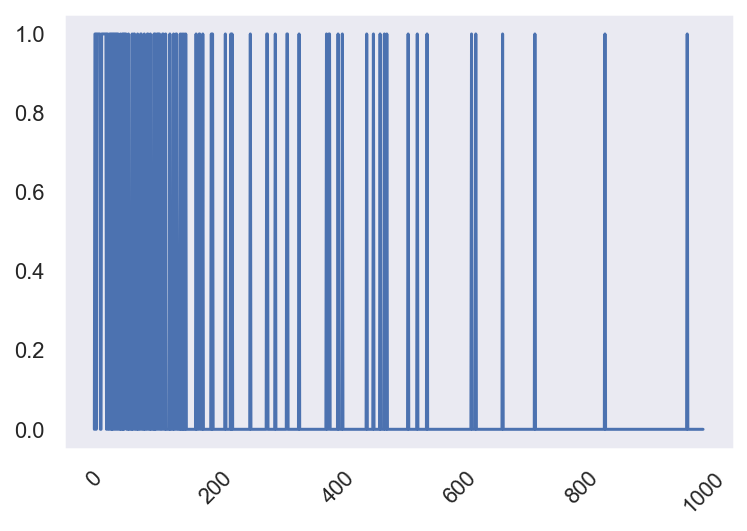

In [15]:
plt.plot(train_data[0])
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

    기준 모델을 만들어 기준보다 유닛의 수가 크거나 작은 모델과 비교를 해보겠습니다.

In [26]:
base_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

base_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy', 'binary_crossentropy'])

base_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [32]:
base_history = base_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                             validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.2555 - accuracy: 0.8971 - binary_crossentropy: 0.2555 - val_loss: 0.3410 - val_accuracy: 0.8558 - val_binary_crossentropy: 0.3410
Epoch 2/20
49/49 - 0s - loss: 0.2436 - accuracy: 0.9030 - binary_crossentropy: 0.2436 - val_loss: 0.3454 - val_accuracy: 0.8540 - val_binary_crossentropy: 0.3454
Epoch 3/20
49/49 - 0s - loss: 0.2356 - accuracy: 0.9068 - binary_crossentropy: 0.2356 - val_loss: 0.3525 - val_accuracy: 0.8508 - val_binary_crossentropy: 0.3525
Epoch 4/20
49/49 - 0s - loss: 0.2259 - accuracy: 0.9102 - binary_crossentropy: 0.2259 - val_loss: 0.3638 - val_accuracy: 0.8482 - val_binary_crossentropy: 0.3638
Epoch 5/20
49/49 - 0s - loss: 0.2178 - accuracy: 0.9142 - binary_crossentropy: 0.2178 - val_loss: 0.3701 - val_accuracy: 0.8487 - val_binary_crossentropy: 0.3701
Epoch 6/20
49/49 - 0s - loss: 0.2093 - accuracy: 0.9188 - binary_crossentropy: 0.2093 - val_loss: 0.3809 - val_accuracy: 0.8469 - val_binary_crossentropy: 0.3809
Epoch 7/20
49/49 - 0s - loss

    작은 모델을 만들어보자

In [30]:
small_model = keras.Sequential([
    keras.layers.Dense(6, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

small_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy', 'binary_crossentropy'])

small_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 6)                 6006      
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 7         
Total params: 6,055
Trainable params: 6,055
Non-trainable params: 0
_________________________________________________________________


In [33]:
small_history = small_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                             validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.2994 - accuracy: 0.8785 - binary_crossentropy: 0.2994 - val_loss: 0.3305 - val_accuracy: 0.8593 - val_binary_crossentropy: 0.3305
Epoch 2/20
49/49 - 0s - loss: 0.2972 - accuracy: 0.8790 - binary_crossentropy: 0.2972 - val_loss: 0.3306 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3306
Epoch 3/20
49/49 - 0s - loss: 0.2970 - accuracy: 0.8782 - binary_crossentropy: 0.2970 - val_loss: 0.3343 - val_accuracy: 0.8581 - val_binary_crossentropy: 0.3343
Epoch 4/20
49/49 - 0s - loss: 0.2965 - accuracy: 0.8777 - binary_crossentropy: 0.2965 - val_loss: 0.3312 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3312
Epoch 5/20
49/49 - 0s - loss: 0.2960 - accuracy: 0.8794 - binary_crossentropy: 0.2960 - val_loss: 0.3314 - val_accuracy: 0.8592 - val_binary_crossentropy: 0.3314
Epoch 6/20
49/49 - 0s - loss: 0.2957 - accuracy: 0.8783 - binary_crossentropy: 0.2957 - val_loss: 0.3320 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3320
Epoch 7/20
49/49 - 0s - loss

    큰 모델 만들기

In [34]:
big_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

big_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy', 'binary_crossentropy'])

big_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               128128    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 144,769
Trainable params: 144,769
Non-trainable params: 0
_________________________________________________________________


In [41]:
big_history = big_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                             validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.0047 - accuracy: 0.9999 - binary_crossentropy: 0.0047 - val_loss: 0.6867 - val_accuracy: 0.8388 - val_binary_crossentropy: 0.6867
Epoch 2/20
49/49 - 0s - loss: 0.0029 - accuracy: 1.0000 - binary_crossentropy: 0.0029 - val_loss: 0.7205 - val_accuracy: 0.8382 - val_binary_crossentropy: 0.7205
Epoch 3/20
49/49 - 0s - loss: 0.0019 - accuracy: 1.0000 - binary_crossentropy: 0.0019 - val_loss: 0.7533 - val_accuracy: 0.8388 - val_binary_crossentropy: 0.7533
Epoch 4/20
49/49 - 0s - loss: 0.0014 - accuracy: 1.0000 - binary_crossentropy: 0.0014 - val_loss: 0.7802 - val_accuracy: 0.8383 - val_binary_crossentropy: 0.7802
Epoch 5/20
49/49 - 0s - loss: 0.0010 - accuracy: 1.0000 - binary_crossentropy: 0.0010 - val_loss: 0.8079 - val_accuracy: 0.8392 - val_binary_crossentropy: 0.8079
Epoch 6/20
49/49 - 0s - loss: 8.0437e-04 - accuracy: 1.0000 - binary_crossentropy: 8.0437e-04 - val_loss: 0.8324 - val_accuracy: 0.8392 - val_binary_crossentropy: 0.8324
Epoch 7/20
49/49 - 0

training dataset의 loss(손실)값과 test dataset의 loss(손실)값 시각화

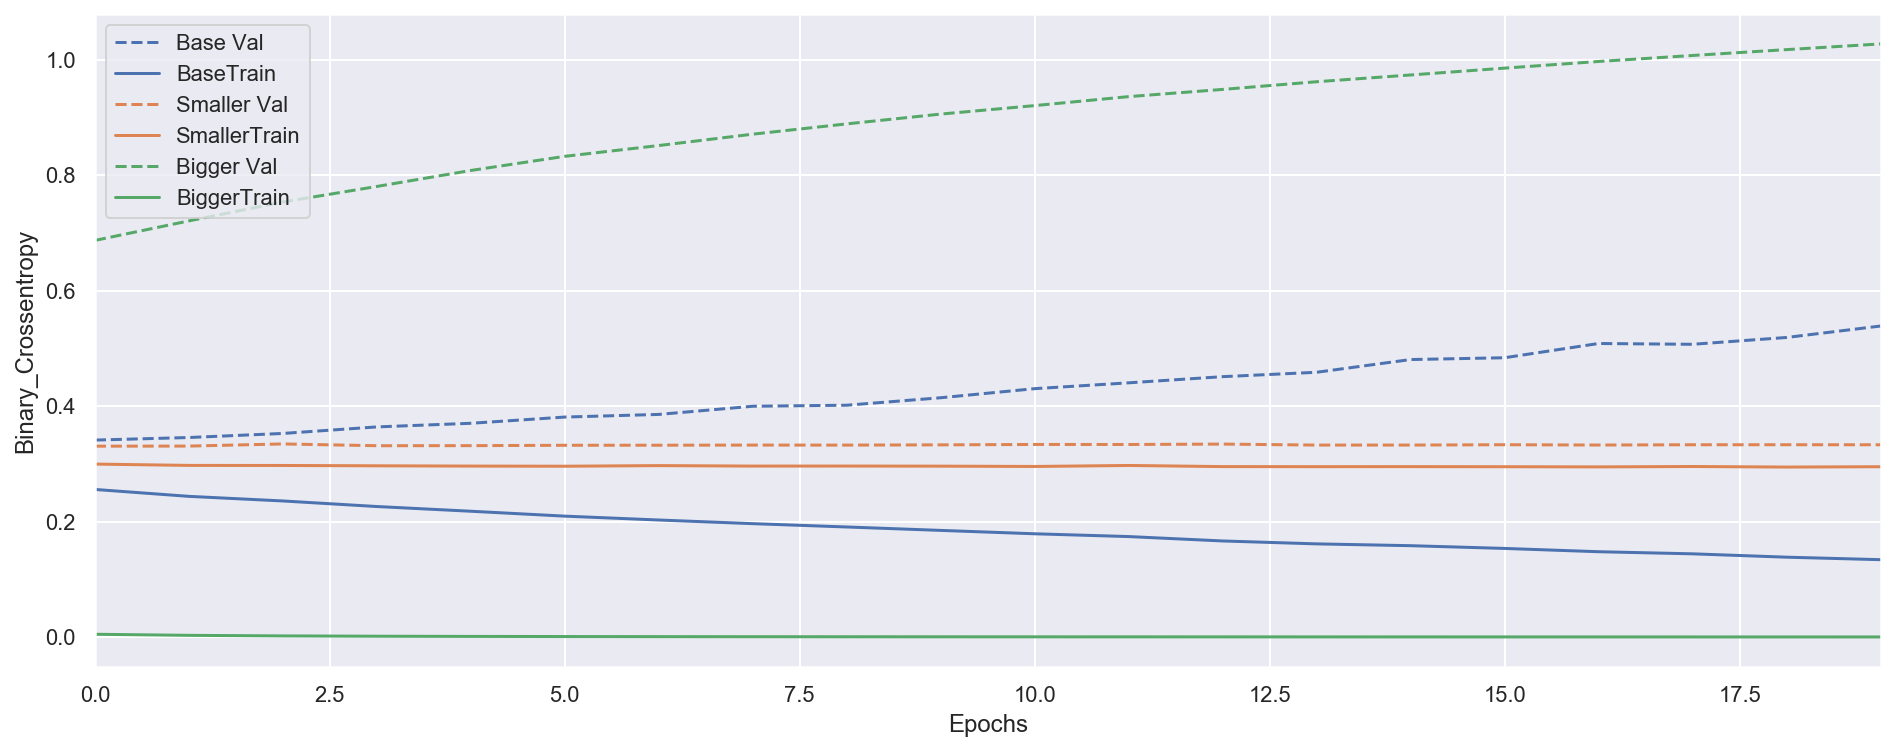

In [46]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,6))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_' + key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+'Train')
                       
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('-', ' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])
plot_history([('base', base_history),
              ('smaller', small_history),
              ('bigger', big_history)])

big model의 경우 에포크가 시작하자마자 과대적합(Overfitting)이 일어나는 것을 알 수 있고 생각보다 심하게 이뤄집니다. 모델 네트워크의 용량이 많을수록 과대적합이 될 확률이 커집니다.(훈련 loss값과 검증 loss값 사이에 큰 차이가 발생)

과대적합(Overfitting)을 방지하기 위한 전략

    - 가중치 규제하기
        1. 훈련 데이터와 네트워크 구조가 주어졌을 때, 데이터를 설명할 수 있는 가중치의 조합을 간단하게!
        2. 모델 파라미터의 분포를 봤을 때 엔트로피가 작은 모델(적은 파라미터를 가지는 모델), 즉 과대적합을 완화시키는 일반적인 방법은 가중치가 작은 값을 가지도록 네트워크의 복잡도에 제약을 가하는 것이라고 할 수 있습니다. '가중치 규제(Weight regularization)
            * L1 규제는 가중치의 절댓값에 비례하는 비용이 추가
            * L2 규제는 가중치의 제곱에 비례하는 비용이 추가, 신경망에서는 L2규제를 가중치 감쇠(weight decay)라고도 합니다.

In [43]:
l2_model = keras.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy', 'binary_crossentropy'])

l2_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                             validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6362 - accuracy: 0.6929 - binary_crossentropy: 0.5927 - val_loss: 0.4927 - val_accuracy: 0.8113 - val_binary_crossentropy: 0.4513
Epoch 2/20
49/49 - 0s - loss: 0.4164 - accuracy: 0.8462 - binary_crossentropy: 0.3749 - val_loss: 0.3873 - val_accuracy: 0.8545 - val_binary_crossentropy: 0.3460
Epoch 3/20
49/49 - 0s - loss: 0.3636 - accuracy: 0.8669 - binary_crossentropy: 0.3230 - val_loss: 0.3708 - val_accuracy: 0.8598 - val_binary_crossentropy: 0.3312
Epoch 4/20
49/49 - 0s - loss: 0.3498 - accuracy: 0.8721 - binary_crossentropy: 0.3113 - val_loss: 0.3687 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3312
Epoch 5/20
49/49 - 0s - loss: 0.3440 - accuracy: 0.8726 - binary_crossentropy: 0.3073 - val_loss: 0.3640 - val_accuracy: 0.8602 - val_binary_crossentropy: 0.3283
Epoch 6/20
49/49 - 0s - loss: 0.3393 - accuracy: 0.8760 - binary_crossentropy: 0.3044 - val_loss: 0.3622 - val_accuracy: 0.8598 - val_binary_crossentropy: 0.3281
Epoch 7/20
49/49 - 0s - loss

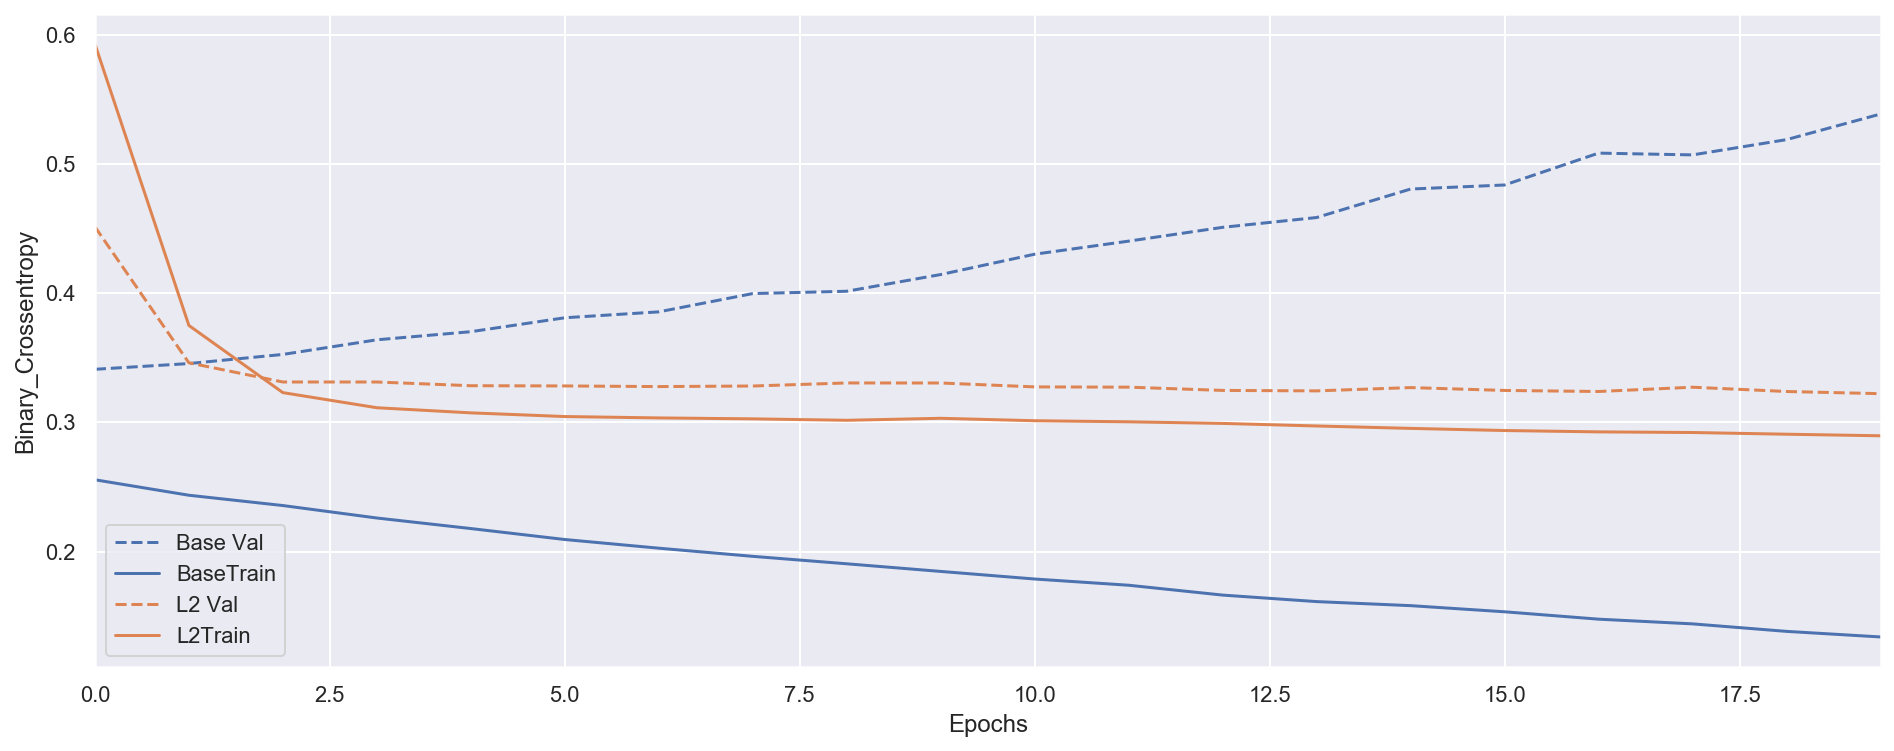

In [47]:
plot_history([('base', base_history),
              ('L2', l2_history)
             ])

결과에서 보듯이 모델 파라미터의 개수는 똑같지만 L2규제를 적용한 모델이 base model보다 과대적합에 훨씬 잘 견디고 있는 것을 볼 수 있습니다.

    - dropout 추가하기
        * 신경망에서 쓰이는 가장 효과적이고 널리 사용하는 규제 기법중 하나입니다.
        * dropout은 층을 이용해 네트워크에 추가할 수 있습니다.
        
    두 개의 층에 dropout 규제를 추가하여 과대적합이 얼마나 감소하는지 알아 보겠습니다.

In [50]:
dpt_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy', 'binary_crossentropy'])

dpt_history = dpt_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                             validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6841 - accuracy: 0.5583 - binary_crossentropy: 0.6841 - val_loss: 0.6280 - val_accuracy: 0.7269 - val_binary_crossentropy: 0.6280
Epoch 2/20
49/49 - 0s - loss: 0.5848 - accuracy: 0.6974 - binary_crossentropy: 0.5848 - val_loss: 0.4655 - val_accuracy: 0.8180 - val_binary_crossentropy: 0.4655
Epoch 3/20
49/49 - 0s - loss: 0.4784 - accuracy: 0.7861 - binary_crossentropy: 0.4784 - val_loss: 0.3797 - val_accuracy: 0.8453 - val_binary_crossentropy: 0.3797
Epoch 4/20
49/49 - 0s - loss: 0.4250 - accuracy: 0.8195 - binary_crossentropy: 0.4250 - val_loss: 0.3453 - val_accuracy: 0.8510 - val_binary_crossentropy: 0.3453
Epoch 5/20
49/49 - 0s - loss: 0.3931 - accuracy: 0.8381 - binary_crossentropy: 0.3931 - val_loss: 0.3338 - val_accuracy: 0.8548 - val_binary_crossentropy: 0.3338
Epoch 6/20
49/49 - 0s - loss: 0.3758 - accuracy: 0.8480 - binary_crossentropy: 0.3758 - val_loss: 0.3299 - val_accuracy: 0.8587 - val_binary_crossentropy: 0.3299
Epoch 7/20
49/49 - 0s - loss

검증 고고

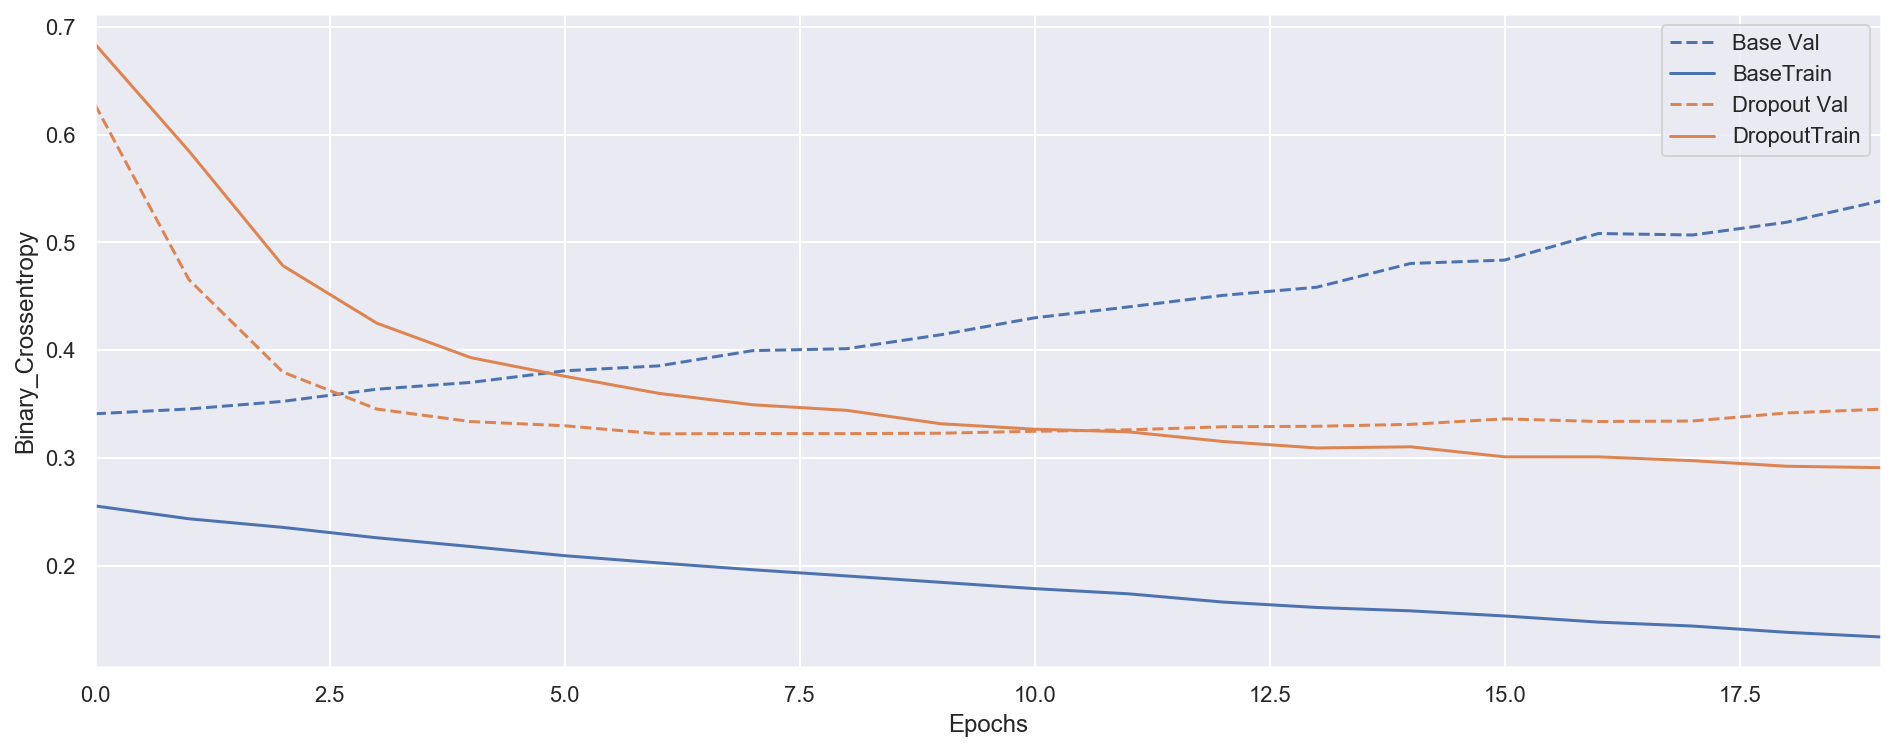

In [51]:
plot_history([('base', base_history),
              ('dropout', dpt_history)
             ])

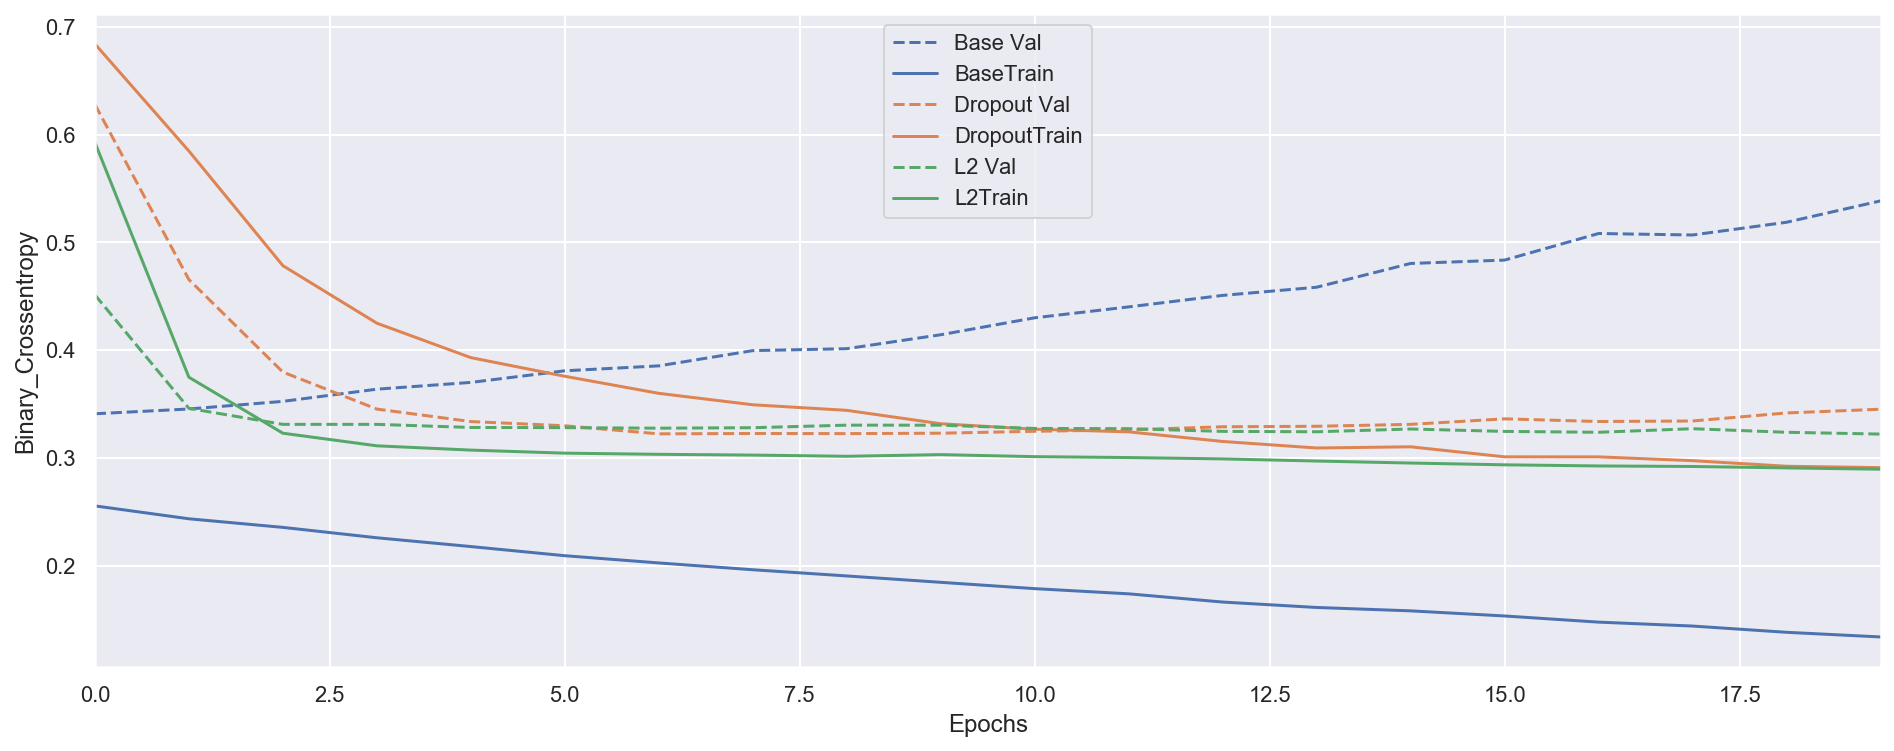

In [52]:
plot_history([('base', base_history),
              ('dropout', dpt_history),
              ('L2', l2_history)
             ])

###### 과대적합을 방지하기 위한 결론
    
    1. 더 많은 훈련 데이터를 학습시킨다.
    2. 네트워크의 용량을 줄인다. (ex. Dense(16 ..)
    3. 가중치 규제를 추가한다. (L2)
    4. 드롭아웃을 추가한다.